## Import Packages

In [300]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

## Generate Synthetic Data for Random Forests Classification

In [301]:
def assign_grade(mark):
    if mark >= 900: return 'A'
    elif mark >= 800: return 'B'
    elif mark >= 500: return 'C'
    elif mark >= 200: return 'D'
    else: return 'F'

def assign_merit(row):
  marks = row['marks']
  age = row['age']
  return marks * (100 - age)


In [302]:
ROW_SZ = 1000

data = pd.DataFrame()

data['age'] = np.random.randint(1, 100, size=ROW_SZ)
data['marks'] = np.random.randint(1, 1000, size=ROW_SZ)
data['grade'] = data.marks.apply(assign_grade)
data['merit'] = data.apply(assign_merit, axis = 1)

data

,age,marks,grade,merit
0,10,182,F,16380
1,28,48,F,3456
2,72,178,F,4984
3,20,438,D,35040
4,93,246,D,1722
...,...,...,...,...
995,89,805,B,8855
996,47,576,C,30528
997,21,680,C,53720
998,10,543,C,48870


## Split the Data


The code below splits the data into separate variables for the features and target, then splits into training and test data.

In [303]:
# Split the data into features (X) and target (y)
X = data.drop('grade', axis=1)
y = data['grade']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Fit and Evaluate the Model

We first create an instance of the Random Forest model, with the default parameters. We then fit this to our training data. We pass both the features and the target variable, so the model can learn.

In [304]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

At this point, we have a trained Random Forest model, but we need to find out whether it is making accurate predictions.

In [305]:
y_pred = rf.predict(X_test)

The simplest way to evaluate this model is using accuracy. We check the predictions against the actual values in the test set and count up how many the model got right.

In [306]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",'{:.4%}'.format(accuracy))

Accuracy: 99.5000%


### We Plot Confusion Matrix

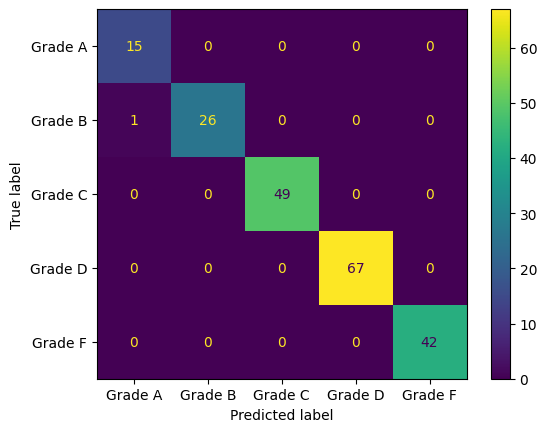

In [307]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your true labels and predicted labels, respectively
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels (if applicable)
class_names = ['Grade A', 'Grade B', 'Grade C','Grade D', 'Grade F']  # Replace with your actual class labels

# Create ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot Confusion Matrix
disp.plot()

# Show plot
plt.show()


## Visualize the Results

We can use the following code to visualize our first 3 trees.

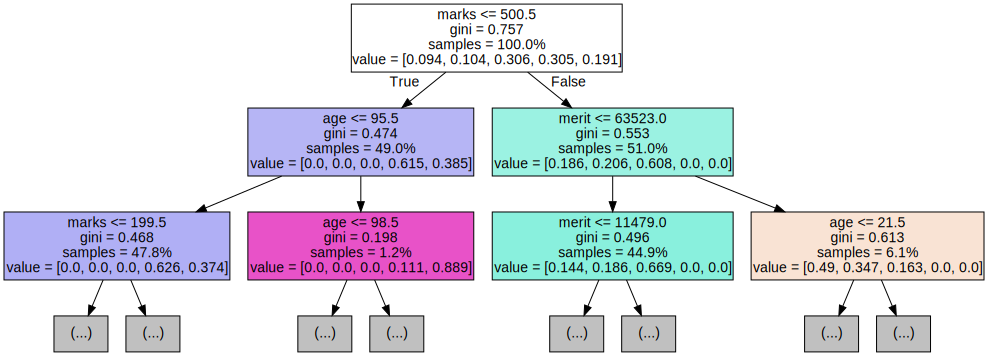

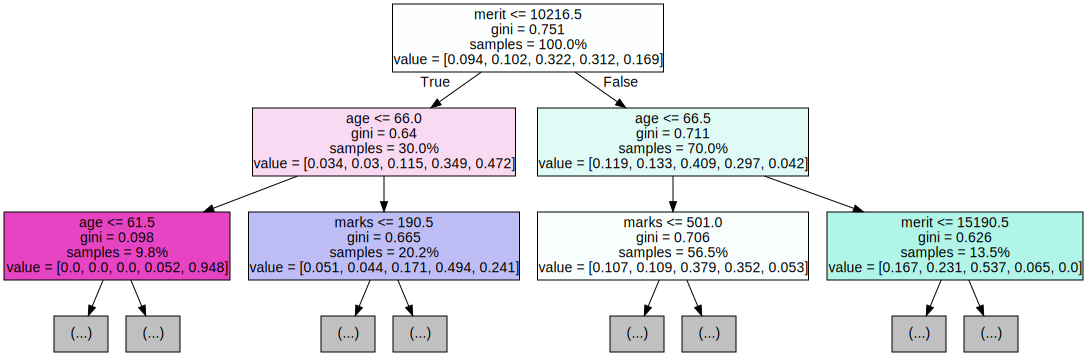

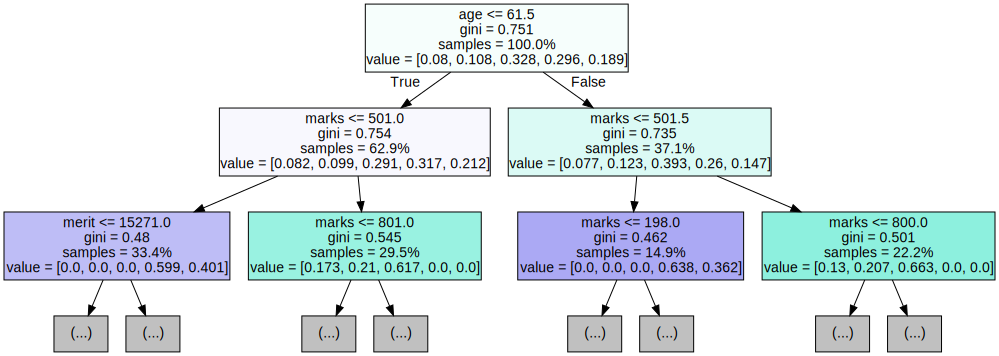

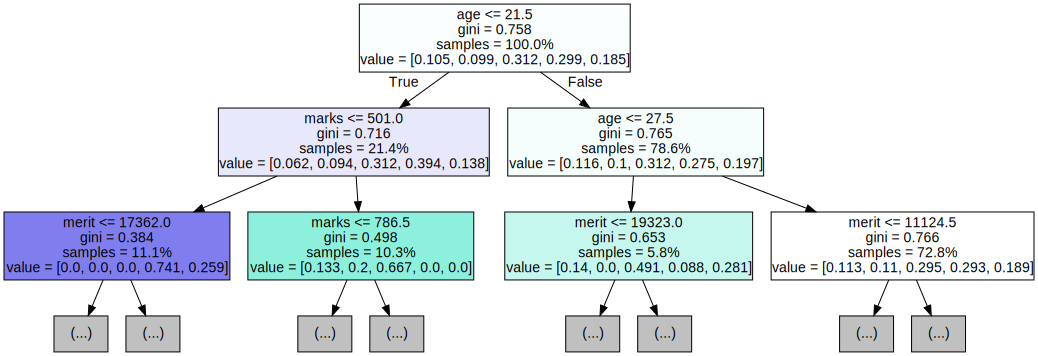

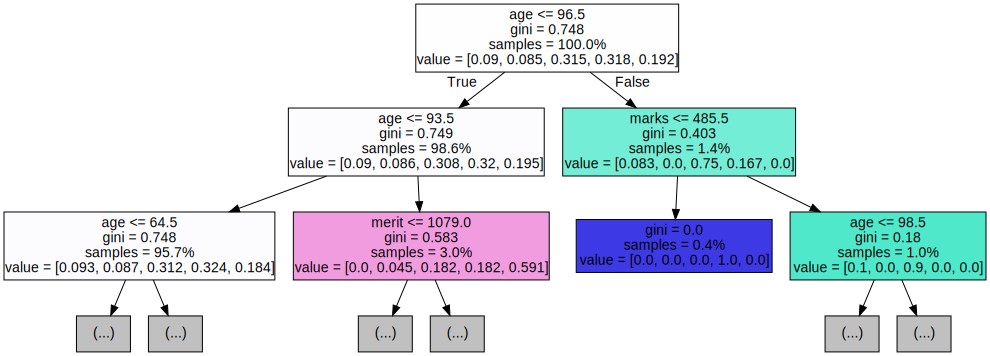

In [308]:
# Export the first five decision trees from the forest
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

for i in range(5):
    tree = rf.estimators_[i] # rf = random forest classifier
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=True,
                               rotate=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)